## Librerias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime as dt
import sql

## Bases de datos y analisis de la información

Se importan las bases de datos como tortugas, muestra y categ y se analiza la información que contiene

In [2]:
tortugas = pd.read_csv(r'./E1_Dataset_tortugas.csv');tortugas.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [3]:
tortugas['Researcher'].value_counts()

Researcher_20    9778
Researcher_30    5346
Researcher_7     1011
Researcher_25     515
Researcher_10     347
Researcher_32     339
Researcher_13     337
Researcher_6      131
Researcher_37      41
Researcher_4       36
Researcher_17      35
Researcher_3       33
Researcher_11      19
Researcher_9       18
Researcher_1       15
Researcher_22      11
Researcher_31       9
Researcher_19       8
Researcher_21       5
Researcher_35       4
Researcher_0        4
Researcher_12       3
Researcher_27       2
Researcher_2        2
Researcher_26       2
Researcher_24       2
Researcher_16       1
Researcher_18       1
Researcher_8        1
Researcher_36       1
Researcher_28       1
Researcher_23       1
Researcher_34       1
Researcher_14       1
Researcher_5        1
Name: Researcher, dtype: int64

In [4]:
muestra=pd.read_csv(r'./E1_Muestra_de_presentacion.csv')

In [5]:
tortugas.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'Tag_2', 'Lost_Tags', 'T_Number', 'CCL_cm', 'CCW_cm',
       'Weight_Kg', 'Sex', 'TurtleCharacteristics', 'Status', 'ReleaseSite',
       'Date_TimeRelease'],
      dtype='object')

In [6]:
categ = pd.read_csv(r'./E1_Categoria_Sitio_Captura.csv')

In [7]:
muestra

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3
...,...,...
1271,CaptureSite_9_201940,0
1272,CaptureSite_9_201941,7
1273,CaptureSite_9_201942,7
1274,CaptureSite_9_201943,3


## Analisis Exploratorio

Se hace un analisis exploratorio de la información, así como el volumen de crecimiento de los datos

In [8]:
df = pd.merge(categ, tortugas, on='CaptureSite', right_index=True)
df.head(3)

,CaptureSite,CaptureSiteCategory,Type,Rescue_ID,Date_TimeCaught,Researcher,ForagingGround,CaptureMethod,Fisher,LandingSite,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000_RE_0060,2000-12-22,Researcher_25,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0187,2001-10-28,Researcher_6,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001_RE_0197,2001-11-01,Researcher_6,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01


In [9]:
df.loc[df['ForagingGround']=='creek', 'ForagingGround']='Creek'

In [10]:
df['Date_TimeCaught'] = pd.to_datetime(df['Date_TimeCaught'], format='%Y-%m-%d')

In [11]:
#Cambios en los datos
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

/Users/pablobasapacheco/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


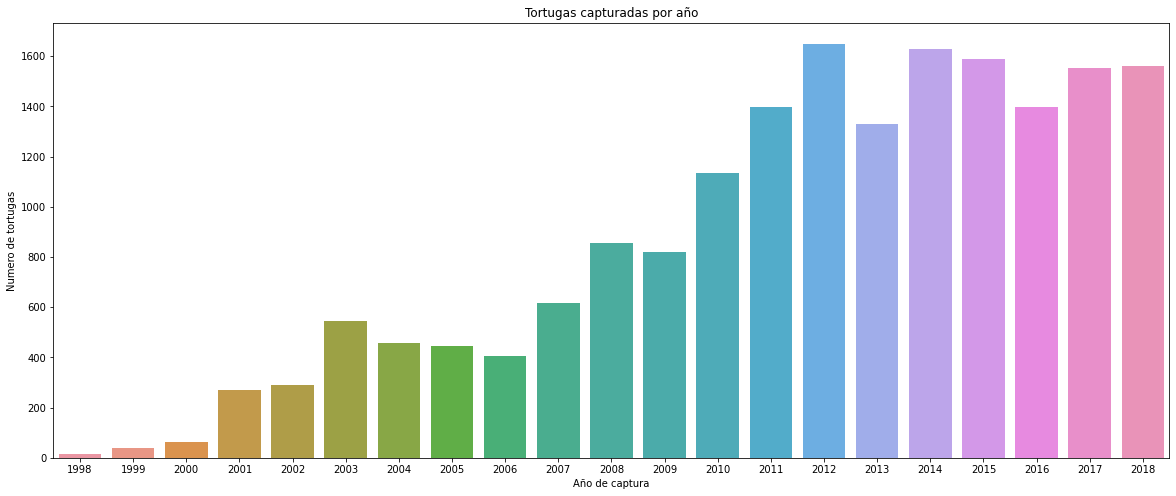

In [12]:
yearly = df['Date_TimeCaught'].dt.year.value_counts().sort_index()

plt.figure(figsize = (20, 8))
ax = sns.barplot(yearly.index, yearly.values)
bars = ax.patches
values = yearly.values

for b, v in zip(bars, values):
    h = b.get_height()
    w = b.get_width()
    x_loc = b.get_x()
    
ax.set_ylabel("Numero de tortugas")
ax.set_xlabel("Año de captura")
ax.set_title("Tortugas capturadas por año")
plt.show()

## Predicción de Datos

Se procede a hacer una predición de datos para 2019 y 2020.
Para ello se definirian los parametros:
- month_caught
- year_caught
- week_of_year_caught
- day_caught
- day_of_week_caught
- year_woy
- day_of_year
- hour
- Weight_Kg

con ello, analizaremos predeciremos los datos hasta 2021, una vez se haga esto los dividiremos en 5 bloques:
- 16-17
- 17-18
- 18-19
- 19-20
- 20-21

Todo ello nos dara una base de datos a la que llamaremos "datoscomparativos"

In [13]:
df['month_caught'] = df['Date_TimeCaught'].dt.month

In [14]:
df['year_caught'] = df['Date_TimeCaught'].dt.year

In [15]:
df['week_of_year_caught'] = df['Date_TimeCaught'].dt.week

In [16]:
df['day_caught'] = df['Date_TimeCaught'].dt.day

In [17]:
df['day_of_week_caught'] = pd.DatetimeIndex(df['Date_TimeCaught']).dayofweek

In [18]:
df["year_woy"]=df.year_caught*100+df.week_of_year_caught

In [19]:
df['day_of_year']= pd.DatetimeIndex(df['Date_TimeCaught']).dayofyear

In [20]:
df['hour'] = df['Date_TimeCaught'].dt.hour

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df.isnull().sum().sort_values(ascending=False)

T_Number                 18024
Lost_Tags                17137
Date_TimeRelease          6108
Weight_Kg                 5409
Sex                       4330
Status                    3633
ReleaseSite                 75
TurtleCharacteristics       41
CCW_cm                      27
CCL_cm                      24
Species                      0
ForagingGround               0
Researcher                   0
Date_TimeCaught              0
Rescue_ID                    0
CaptureMethod                0
Type                         0
CaptureSiteCategory          0
Fisher                       0
LandingSite                  0
hour                         0
Tag_1                        0
Tag_2                        0
day_of_year                  0
month_caught                 0
year_caught                  0
week_of_year_caught          0
day_caught                   0
day_of_week_caught           0
year_woy                     0
CaptureSite                  0
dtype: int64

In [23]:
del df['T_Number']
del df['Lost_Tags']

In [24]:
df['Weight_Kg'].fillna((df['Weight_Kg'].median()), inplace=True)

In [25]:
df.groupby(by = df['CaptureSite']).median()

,CCL_cm,CCW_cm,Weight_Kg,month_caught,year_caught,week_of_year_caught,day_caught,day_of_week_caught,year_woy,day_of_year,hour
CaptureSite,,,,,,,,,,,
CaptureSite_0,39.900,38.200,7.500,8.0,2014.0,35.0,16.0,2.0,201430.0,240.0,0.0
CaptureSite_1,39.000,36.500,7.130,7.0,2013.0,30.0,17.0,3.0,201326.0,206.0,0.0
CaptureSite_10,38.000,35.700,7.345,6.0,2016.0,24.0,15.0,3.0,201650.5,167.5,0.0
CaptureSite_11,41.600,40.135,7.500,7.0,2009.0,30.0,17.0,3.0,200914.0,204.0,0.0
CaptureSite_12,39.700,37.950,7.500,7.0,2010.0,31.0,16.0,3.0,201048.0,212.0,0.0
CaptureSite_13,39.400,37.600,7.500,8.0,2014.0,35.0,15.0,3.0,201444.0,240.0,0.0
CaptureSite_14,41.400,39.200,7.500,6.0,2013.0,26.0,18.0,4.0,201313.0,181.0,0.0
CaptureSite_15,36.500,34.000,5.785,7.0,2015.0,28.0,16.0,3.0,201503.0,197.0,0.0
CaptureSite_16,42.600,40.700,7.500,8.0,2011.0,31.0,16.0,3.0,201117.0,215.0,0.0


In [26]:
df['CCL_cm'] = df['CCL_cm'].fillna(df.groupby(['CaptureSite'])['CCL_cm'].transform('median'))
df['CCW_cm'] = df['CCW_cm'].fillna(df.groupby(['CaptureSite'])['CCW_cm'].transform('median'))

In [27]:
df[['Date_TimeRelease', 'Date_TimeCaught']]

,Date_TimeRelease,Date_TimeCaught
0,22/12/00,2000-12-22
1,28/10/01,2001-10-28
2,01/11/01,2001-11-01
3,11/03/02,2002-03-11
4,08/08/02,2002-08-08
...,...,...
18057,18/12/18,2018-12-18
18058,18/12/18,2018-12-18
18059,24/12/18,2018-12-24
18060,24/12/18,2018-12-24


In [28]:
df['Sex'].fillna('Unknown', inplace=True)

In [29]:
df.loc[df['Sex']=='Not_Recorded', 'Sex']='Unknown'

In [30]:
df['Status'].fillna('Not_Recorded', inplace=True)

In [31]:
df['ReleaseSite'].fillna('Unknown', inplace=True)

In [32]:
df['TurtleCharacteristics'].fillna('Unknown', inplace=True)

In [33]:
muestra["year_woy"]=(muestra.ID.apply(lambda x: x.split("_")[-1])).astype(int)
muestra["CaptureSite"]=muestra.ID.apply(lambda x: ("_").join(x.split("_")[0:-1]))

In [34]:
tortugas["Date_TimeCaught"]=pd.to_datetime(tortugas["Date_TimeCaught"])
print(tortugas.Date_TimeCaught.min(),tortugas.Date_TimeCaught.max())
tortugas["year"]=tortugas.Date_TimeCaught.dt.year
tortugas["week_of_year"]=tortugas.Date_TimeCaught.dt.weekofyear
tortugas["year_woy"]=tortugas.year*200+tortugas.week_of_year

1998-04-17 00:00:00 2018-12-31 00:00:00


In [35]:
keys=pd.concat([tortugas[["year_woy","CaptureSite"]],muestra[["year_woy","CaptureSite"]]])
CaptureSite_min_year_woy=keys.groupby("CaptureSite").year_woy.min().rename("year_woy").reset_index()
CaptureSite_min_year_woy.head()

,CaptureSite,year_woy
0,CaptureSite_0,201901
1,CaptureSite_1,201901
2,CaptureSite_10,201901
3,CaptureSite_11,201901
4,CaptureSite_12,201901


In [36]:
range_year_woy=pd.DataFrame()

In [37]:
range_year_woy["Date_TimeCaught"]=pd.date_range(start=tortugas.Date_TimeCaught.min(),end=dt(2020,12,31))

In [38]:
range_year_woy["year"]=range_year_woy.Date_TimeCaught.dt.year
range_year_woy["week_of_year"]=range_year_woy.Date_TimeCaught.dt.weekofyear
range_year_woy["year_woy"]=range_year_woy.year*200+range_year_woy.week_of_year
range_year_woy.drop_duplicates(["year_woy"],inplace=True)
range_year_woy

,Date_TimeCaught,year,week_of_year,year_woy
0,1998-04-17,1998,16,399616
3,1998-04-20,1998,17,399617
10,1998-04-27,1998,18,399618
17,1998-05-04,1998,19,399619
24,1998-05-11,1998,20,399620
...,...,...,...,...
8263,2020-11-30,2020,49,404049
8270,2020-12-07,2020,50,404050
8277,2020-12-14,2020,51,404051
8284,2020-12-21,2020,52,404052


In [39]:
final_data=[]
for site , year_woy in zip(CaptureSite_min_year_woy.CaptureSite.values,CaptureSite_min_year_woy.year_woy.values) :

    one_site_df=range_year_woy[range_year_woy.year_woy>=year_woy]
    one_site_df["CaptureSite"]=site
    final_data.append(one_site_df)
final_data=pd.concat(final_data)
len(final_data)

34510

In [40]:
final_data

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite
0,1998-04-17,1998,16,399616,CaptureSite_0
3,1998-04-20,1998,17,399617,CaptureSite_0
10,1998-04-27,1998,18,399618,CaptureSite_0
17,1998-05-04,1998,19,399619,CaptureSite_0
24,1998-05-11,1998,20,399620,CaptureSite_0
...,...,...,...,...,...
8263,2020-11-30,2020,49,404049,CaptureSite_9
8270,2020-12-07,2020,50,404050,CaptureSite_9
8277,2020-12-14,2020,51,404051,CaptureSite_9
8284,2020-12-21,2020,52,404052,CaptureSite_9


In [41]:
Target=tortugas.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Capture_Number").reset_index()
final_data=final_data.merge(Target,on=["year_woy","CaptureSite"],how="left")

In [42]:
final_data.Capture_Number.fillna(1,inplace=True)

In [43]:
final_data

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,1998-04-17,1998,16,399616,CaptureSite_0,1.0
1,1998-04-20,1998,17,399617,CaptureSite_0,1.0
2,1998-04-27,1998,18,399618,CaptureSite_0,1.0
3,1998-05-04,1998,19,399619,CaptureSite_0,1.0
4,1998-05-11,1998,20,399620,CaptureSite_0,1.0
...,...,...,...,...,...,...
34505,2020-11-30,2020,49,404049,CaptureSite_9,1.0
34506,2020-12-07,2020,50,404050,CaptureSite_9,1.0
34507,2020-12-14,2020,51,404051,CaptureSite_9,1.0
34508,2020-12-21,2020,52,404052,CaptureSite_9,1.0


In [44]:
final_data.Capture_Number.fillna(0,inplace=True)

In [45]:
#añadir una columna llamada "Capture_Number" con el valor 1

new_df=final_data.assign(Capture_Number=1)
final_data

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,1998-04-17,1998,16,399616,CaptureSite_0,1.0
1,1998-04-20,1998,17,399617,CaptureSite_0,1.0
2,1998-04-27,1998,18,399618,CaptureSite_0,1.0
3,1998-05-04,1998,19,399619,CaptureSite_0,1.0
4,1998-05-11,1998,20,399620,CaptureSite_0,1.0
...,...,...,...,...,...,...
34505,2020-11-30,2020,49,404049,CaptureSite_9,1.0
34506,2020-12-07,2020,50,404050,CaptureSite_9,1.0
34507,2020-12-14,2020,51,404051,CaptureSite_9,1.0
34508,2020-12-21,2020,52,404052,CaptureSite_9,1.0


Capturas 2016

In [46]:
c1617=final_data[(final_data.year==2016)|(final_data.year==2017)].head()

In [47]:
c1617

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
928,2016-01-01,2016,53,403253,CaptureSite_0,1.0
929,2016-01-04,2016,1,403201,CaptureSite_0,1.0
930,2016-01-11,2016,2,403202,CaptureSite_0,1.0
931,2016-01-18,2016,3,403203,CaptureSite_0,1.0
932,2016-01-25,2016,4,403204,CaptureSite_0,1.0


In [48]:
c1617['Capture_Number'].value_counts()

1.0    5
Name: Capture_Number, dtype: int64

Capturas 2017

In [49]:
c1718=final_data[(final_data.year==2017)|(final_data.year==2018)].head()

In [50]:
c1718

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
981,2017-01-01,2017,52,403452,CaptureSite_0,1.0
982,2017-01-02,2017,1,403401,CaptureSite_0,1.0
983,2017-01-09,2017,2,403402,CaptureSite_0,1.0
984,2017-01-16,2017,3,403403,CaptureSite_0,1.0
985,2017-01-23,2017,4,403404,CaptureSite_0,1.0


In [51]:
c1718['Capture_Number'].value_counts()

1.0    5
Name: Capture_Number, dtype: int64

Capturas 2018

In [52]:
c1819=final_data[(final_data.year==2018)|(final_data.year==2019)].head()

In [53]:
c1819

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
1033,2018-01-01,2018,1,403601,CaptureSite_0,1.0
1034,2018-01-08,2018,2,403602,CaptureSite_0,1.0
1035,2018-01-15,2018,3,403603,CaptureSite_0,1.0
1036,2018-01-22,2018,4,403604,CaptureSite_0,1.0
1037,2018-01-29,2018,5,403605,CaptureSite_0,1.0


In [54]:
c1819['Capture_Number'].value_counts()

1.0    5
Name: Capture_Number, dtype: int64

Capturas 2019

In [55]:
c1920 = final_data[(final_data.year==2019)|(final_data.year==2020)].head()

In [56]:
c1920

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
1085,2019-01-01,2019,1,403801,CaptureSite_0,1.0
1086,2019-01-07,2019,2,403802,CaptureSite_0,1.0
1087,2019-01-14,2019,3,403803,CaptureSite_0,1.0
1088,2019-01-21,2019,4,403804,CaptureSite_0,1.0
1089,2019-01-28,2019,5,403805,CaptureSite_0,1.0


In [57]:
c1920['Capture_Number'].value_counts()

1.0    5
Name: Capture_Number, dtype: int64

Capturas 2020

In [58]:
c2021 = final_data[(final_data.year==2020)|(final_data.year==2021)].head()

In [59]:
c2021

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
1137,2020-01-01,2020,1,404001,CaptureSite_0,1.0
1138,2020-01-06,2020,2,404002,CaptureSite_0,1.0
1139,2020-01-13,2020,3,404003,CaptureSite_0,1.0
1140,2020-01-20,2020,4,404004,CaptureSite_0,1.0
1141,2020-01-27,2020,5,404005,CaptureSite_0,1.0


In [60]:
c2021['Capture_Number'].value_counts()

1.0    5
Name: Capture_Number, dtype: int64









## Caso Boro

En este ejercicio, hay que procesar el dataset del archivo E2_Dataset_Boro

Esta desaladora se corresponde con uno de los “CaptureSite” del ejercicio 1 y tiene una variable destacada, el Boro (tag “BORON”). Este elemento químico tiene una gran influencia en el comportamiento de las tortugas.
Asumiendo que tu predicción del ejercicio 1 es correcta y has ya tienes los datos de captura de tortugas durante los años del segundo dataset, ¿podrías decirnos a qué CaptureSite se corresponde esta desaladora?

Para comparar debes de usar el dataset creado con los nuevos datos, Boro es datos de 2019 y 2020 correlacionando Date con Date_TimeCaught. Cuando lo localices, haz que te diga que CaptureSite (columna de datoscomparativos) es. Abajo tienes más instrucciones

## Analisis Exploratorio

Se hace un analisis exploratorio de los datos recogidos en el "dataset_Boro" y los datos que analizamos y predijimos en "datoscomparativos". Esto sirve como base para el siguiente punto.

In [61]:
Boro = pd.read_excel('E2_Dataset_Boro.xlsx')

In [62]:
datoscomparativos = final_data

In [63]:
Boro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 702 non-null    datetime64[ns]
 1   BORON                702 non-null    float64       
 2   INLET_TEMP           702 non-null    float64       
 3   SEA_WATER_COND       702 non-null    int64         
 4   RCK_I_L_PR           702 non-null    float64       
 5   RCK_DP               702 non-null    float64       
 6   HP_PMP_SUC_FLW       702 non-null    float64       
 7   RCK_FRNT_PERM_FLW    702 non-null    float64       
 8   RCK_REAR_PERM_FLW    702 non-null    float64       
 9   RCK_FRNT_PERM_COND   702 non-null    int64         
 10  RCK_REAR_PERM_COND   702 non-null    int64         
 11  ERD_PMP_SUC_FLW      702 non-null    float64       
 12  RCK_2P_I_L_PR        702 non-null    float64       
 13  RCK_2P_I_L_PH        702 non-null  

In [64]:
datoscomparativos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34510 entries, 0 to 34509
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_TimeCaught  34510 non-null  datetime64[ns]
 1   year             34510 non-null  int64         
 2   week_of_year     34510 non-null  int64         
 3   year_woy         34510 non-null  int64         
 4   CaptureSite      34510 non-null  object        
 5   Capture_Number   34510 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.8+ MB


In [65]:
Boro.columns

Index(['Date', 'BORON', 'INLET_TEMP', 'SEA_WATER_COND', 'RCK_I_L_PR', 'RCK_DP',
       'HP_PMP_SUC_FLW', 'RCK_FRNT_PERM_FLW', 'RCK_REAR_PERM_FLW',
       'RCK_FRNT_PERM_COND', 'RCK_REAR_PERM_COND', 'ERD_PMP_SUC_FLW',
       'RCK_2P_I_L_PR', 'RCK_2P_I_L_PH', 'RCK_2P_I_L_TEMP', 'RCK_2P_1STG_FLW',
       'RCK_2P_2STG_FLW', 'RCK_2P_O_L_COND', 'RCK_1P_REAR_PERM_PR'],
      dtype='object')

In [66]:
datoscomparativos.columns

Index(['Date_TimeCaught', 'year', 'week_of_year', 'year_woy', 'CaptureSite',
       'Capture_Number'],
      dtype='object')

In [67]:
Boro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 702 non-null    datetime64[ns]
 1   BORON                702 non-null    float64       
 2   INLET_TEMP           702 non-null    float64       
 3   SEA_WATER_COND       702 non-null    int64         
 4   RCK_I_L_PR           702 non-null    float64       
 5   RCK_DP               702 non-null    float64       
 6   HP_PMP_SUC_FLW       702 non-null    float64       
 7   RCK_FRNT_PERM_FLW    702 non-null    float64       
 8   RCK_REAR_PERM_FLW    702 non-null    float64       
 9   RCK_FRNT_PERM_COND   702 non-null    int64         
 10  RCK_REAR_PERM_COND   702 non-null    int64         
 11  ERD_PMP_SUC_FLW      702 non-null    float64       
 12  RCK_2P_I_L_PR        702 non-null    float64       
 13  RCK_2P_I_L_PH        702 non-null  

In [68]:
datoscomparativos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34510 entries, 0 to 34509
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_TimeCaught  34510 non-null  datetime64[ns]
 1   year             34510 non-null  int64         
 2   week_of_year     34510 non-null  int64         
 3   year_woy         34510 non-null  int64         
 4   CaptureSite      34510 non-null  object        
 5   Capture_Number   34510 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.8+ MB


In [69]:
Boro.head(5)

,Date,BORON,INLET_TEMP,SEA_WATER_COND,RCK_I_L_PR,RCK_DP,HP_PMP_SUC_FLW,RCK_FRNT_PERM_FLW,RCK_REAR_PERM_FLW,RCK_FRNT_PERM_COND,RCK_REAR_PERM_COND,ERD_PMP_SUC_FLW,RCK_2P_I_L_PR,RCK_2P_I_L_PH,RCK_2P_I_L_TEMP,RCK_2P_1STG_FLW,RCK_2P_2STG_FLW,RCK_2P_O_L_COND,RCK_1P_REAR_PERM_PR
0,2019-05-08 11:59:00,0.477,28.17,63740,63.2,1.307,595.7,30.3,539.3,310,1233,740.9,11.36,10.05,28.5,399.0,66.0,45,1.32
1,2019-05-09 08:58:00,0.659,29.07,61729,63.9,1.283,590.6,30.2,535.9,294,1263,740.5,11.11,10.00,29.4,398.1,64.4,45,1.32
2,2019-05-09 12:00:00,0.617,29.04,60861,63.6,1.282,591.5,30.1,537.7,293,1255,740.6,11.08,10.02,29.3,405.3,65.2,47,1.30
3,2019-05-11 08:43:00,0.646,28.81,63953,63.3,1.324,594.3,30.2,539.0,296,1220,742.3,11.17,9.96,29.1,404.2,66.0,43,1.29
4,2019-05-11 12:00:00,0.695,29.57,64829,63.9,1.338,591.3,29.7,535.3,305,1294,740.7,10.99,9.99,29.9,408.4,63.5,49,1.30


In [70]:
datoscomparativos.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,1998-04-17,1998,16,399616,CaptureSite_0,1.0
1,1998-04-20,1998,17,399617,CaptureSite_0,1.0
2,1998-04-27,1998,18,399618,CaptureSite_0,1.0
3,1998-05-04,1998,19,399619,CaptureSite_0,1.0
4,1998-05-11,1998,20,399620,CaptureSite_0,1.0


In [71]:
datoscomparativos['CaptureSite'].value_counts()

CaptureSite_25    1190
CaptureSite_1     1190
CaptureSite_22    1190
CaptureSite_23    1190
CaptureSite_5     1190
CaptureSite_24    1190
CaptureSite_3     1190
CaptureSite_2     1190
CaptureSite_14    1190
CaptureSite_16    1190
CaptureSite_19    1190
CaptureSite_12    1190
CaptureSite_20    1190
CaptureSite_10    1190
CaptureSite_7     1190
CaptureSite_9     1190
CaptureSite_13    1190
CaptureSite_26    1190
CaptureSite_0     1190
CaptureSite_28    1190
CaptureSite_4     1190
CaptureSite_15    1190
CaptureSite_17    1190
CaptureSite_8     1190
CaptureSite_21    1190
CaptureSite_18    1190
CaptureSite_27    1190
CaptureSite_6     1190
CaptureSite_11    1190
Name: CaptureSite, dtype: int64

## Unión de Datos

Relacionamos los datos de Boro y los datos que hemos predicho y comprobamos su unión

In [72]:
#Cambiamos el nombre de la columna Boro.Date_TimeCaught a Boro.Date para que coincida con la de datoscompartivos
Boro['Date_TimeCaught'] = Boro['Date'].dt.date

In [73]:
Boro.head(1)

,Date,BORON,INLET_TEMP,SEA_WATER_COND,RCK_I_L_PR,RCK_DP,HP_PMP_SUC_FLW,RCK_FRNT_PERM_FLW,RCK_REAR_PERM_FLW,RCK_FRNT_PERM_COND,RCK_REAR_PERM_COND,ERD_PMP_SUC_FLW,RCK_2P_I_L_PR,RCK_2P_I_L_PH,RCK_2P_I_L_TEMP,RCK_2P_1STG_FLW,RCK_2P_2STG_FLW,RCK_2P_O_L_COND,RCK_1P_REAR_PERM_PR,Date_TimeCaught
0,2019-05-08 11:59:00,0.477,28.17,63740,63.2,1.307,595.7,30.3,539.3,310,1233,740.9,11.36,10.05,28.5,399.0,66.0,45,1.32,2019-05-08


In [74]:
datoscomparativos.head(1)

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,1998-04-17,1998,16,399616,CaptureSite_0,1.0


In [75]:
#hacemos una copia de Boro y Datos Comparativos
df1 = Boro
df2 = datoscomparativos

In [76]:
df1 = df1.astype(str)

In [77]:
df2 = df2.astype(str)

In [78]:
df_joined = pd.merge(df1, df2[["Date_TimeCaught", "CaptureSite","Capture_Number"]], on="Date_TimeCaught", how="left")

In [79]:
#Comprobamos si se han añadido correctamente las zonas de pesca
df_joined['CaptureSite'].value_counts()

CaptureSite_15    107
CaptureSite_21    107
CaptureSite_22    107
CaptureSite_17    107
CaptureSite_10    107
CaptureSite_11    107
CaptureSite_6     107
CaptureSite_8     107
CaptureSite_23    107
CaptureSite_16    107
CaptureSite_5     107
CaptureSite_13    107
CaptureSite_1     107
CaptureSite_19    107
CaptureSite_24    107
CaptureSite_0     107
CaptureSite_28    107
CaptureSite_3     107
CaptureSite_12    107
CaptureSite_2     107
CaptureSite_9     107
CaptureSite_26    107
CaptureSite_7     107
CaptureSite_25    107
CaptureSite_20    107
CaptureSite_4     107
CaptureSite_14    107
CaptureSite_18    107
CaptureSite_27    107
Name: CaptureSite, dtype: int64

## Datos de Captura con mayor cantidad de Boro

Establecemos el lugar, dia y hora donde se hizo la captura con mayor cantidad de Boro

In [80]:
Boro_max = df_joined.sort_values('BORON',ascending=False)

In [81]:
valormaximoboro=Boro_max.loc[:, ['Date', 'BORON', 'CaptureSite', 'Capture_Number'] ]
valormaximoboro.head(1)

,Date,BORON,CaptureSite,Capture_Number
3333,2020-08-03 08:54:00,2.427,CaptureSite_0,1.0
